**Name:** Sudeshna Bora

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import estimate_decoder as ed

**a**

In [2]:
dt = 5  # ms
T = 500000  # in ms
t = np.arange(0, T+1, dt)  # total no.of observation
# standard deviation is 2000 ms / 5ms
stimulus = np.random.normal(0, np.sqrt(400), size=len(t))

Visualising the stimulus

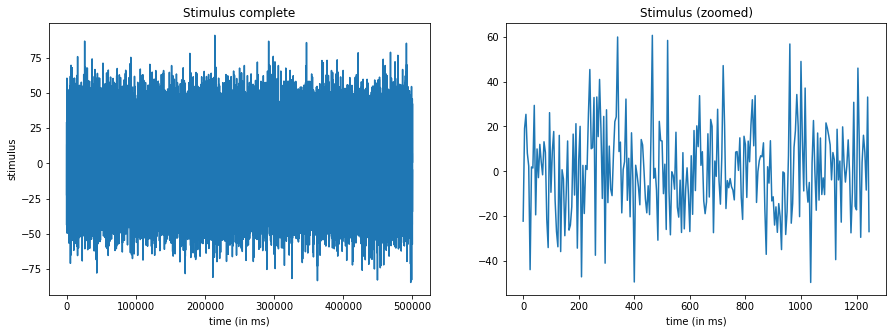

In [3]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

plt.sca(axs[0])
plt.plot(t, stimulus)
plt.title('Stimulus complete')
plt.xlabel('time (in ms)')
plt.ylabel('stimulus')

plt.sca(axs[1])
plt.plot(t[0:250], stimulus[0:250])
plt.title('Stimulus (zoomed)')
plt.xlabel('time (in ms)')

plt.show()

**b**

We have to estimate the firing rate $r_{est}$

The steps we are to follow are :-

1. Find encoding kernel:

$D(\tau) = -A cos(\frac{2 \pi (\tau - \tau_{cos})}{\sigma_{cos}}) exp(\frac{- \tau}{\sigma_{exp}})$

The given values are A = $200spikes/s^{2}$ = $0.0002 spikes/ms^{2}$ , $\tau_{cos} = 20ms$ , $\sigma_{cos} = 140 ms$, $\sigma_{exp} = 60ms$

In [4]:
A = 0.0002
tau_cos = 20
sigma_cos = 140
sigma_exp = 60
D = - A*np.cos(2 * np.pi * (t - tau_cos) / sigma_cos) * np.exp(- t / sigma_exp)

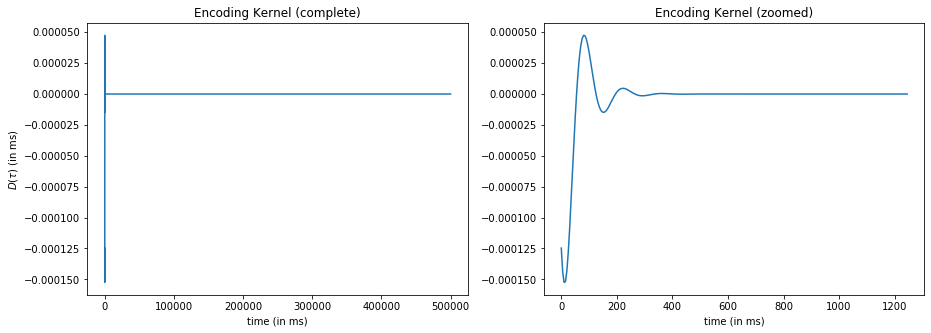

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

plt.sca(axs[0])
plt.plot(t, D)
plt.title('Encoding Kernel (complete)')
plt.xlabel('time (in ms)')
plt.ylabel(r'$D(\tau)$ (in ms)')

plt.sca(axs[1])
plt.plot(t[0:250], D[0:250])
plt.title('Encoding Kernel (zoomed)')
plt.xlabel('time (in ms)')

plt.show()

**Step 2:**  

$r_{est} (t)$ = $r_{0} + \int_0^{\inf} d \tau D (\tau) s(t - \tau)  $

with $r_{0}$ = 150 spikes/s = 0.15 spikes/ms

In [6]:
r0 = 0.15
r_est = r0 + dt * np.convolve(D, stimulus, mode='same')

In [7]:
r_est.shape

(100001,)

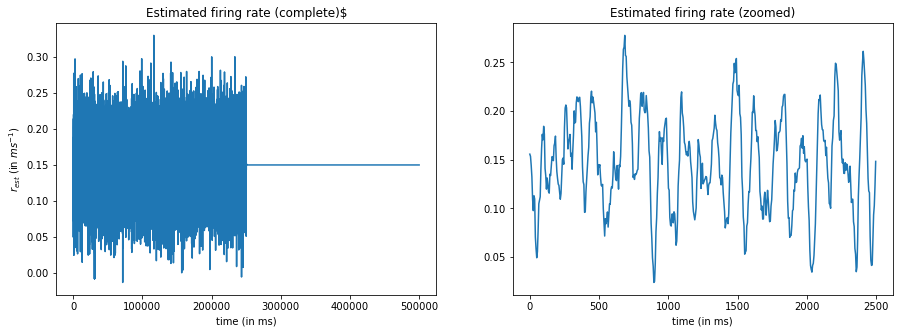

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

plt.sca(axs[0])
plt.plot(t, r_est)
plt.title('Estimated firing rate (complete)')
plt.xlabel('time (in ms)')
plt.ylabel(r'$r_{est}$ (in $ms^{-1}$)')

plt.sca(axs[1])
plt.plot(t[0:500], r_est[0:500])
plt.title('Estimated firing rate (zoomed)')
plt.xlabel('time (in ms)')

plt.show()

**c**

In [9]:
corrected_response = r_est- r0
corrected_response.shape

(100001,)

In [10]:
auto_cor = np.correlate(corrected_response,corrected_response, mode = 'same')*dt/T


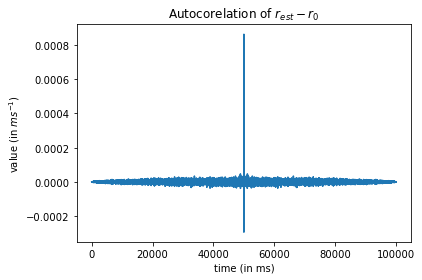

In [11]:
plt.plot(auto_cor)
plt.title(r'Autocorelation of $r_{est} - r_{0}$')
plt.xlabel('time (in ms)')
plt.ylabel(r'value (in $ms^{-1}$)')
plt.show()

**d**

In [12]:
n = corrected_response.shape[0]
maxRate = max(r_est)
randNumbers2 = np.random.rand(n)
ISIs2 = -np.log(randNumbers2)/maxRate

SpikeTimes2 = np.cumsum(ISIs2)
randNumbers = np.random.rand(n)
Ps = r_est/maxRate
rho = SpikeTimes2[randNumbers>Ps[0:n]]

In [13]:
rho.shape

(54434,)

In [14]:
ISI_dis = np.histogram(rho.flatten(), 600000)[0]
rho_auto = np.correlate(ISI_dis, ISI_dis, mode='same')

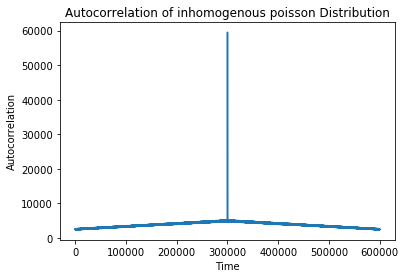

In [15]:
plt.plot(rho_auto)
plt.title('Autocorrelation of inhomogenous poisson Distribution')
plt.xlabel('Time')
plt.ylabel('Autocorrelation')
plt.show()

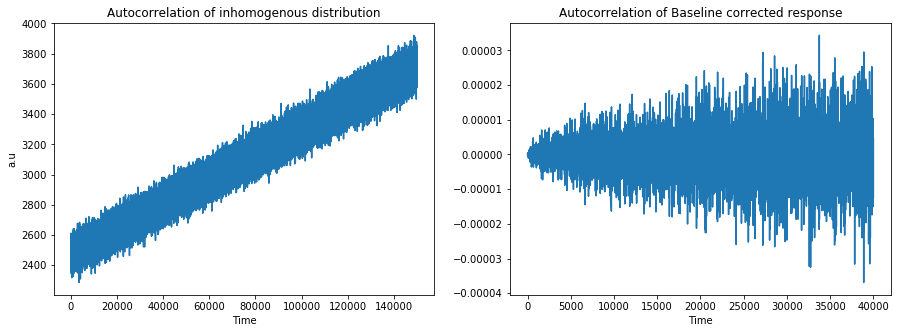

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

plt.sca(axs[0])
plt.plot(rho_auto[0:150000])
plt.title('Autocorrelation of inhomogenous distribution')
plt.xlabel('Time')
plt.ylabel('a.u')

plt.sca(axs[1])
plt.plot(auto_cor[0:40000])
plt.title('Autocorrelation of Baseline corrected response')
plt.xlabel('Time')

plt.show()

I am not sure that my autocorrelation for spike train of inhomogenous poisson distribution is correct. 

**e**

In [17]:
D_auto = np.correlate(D, D, mode = 'same')

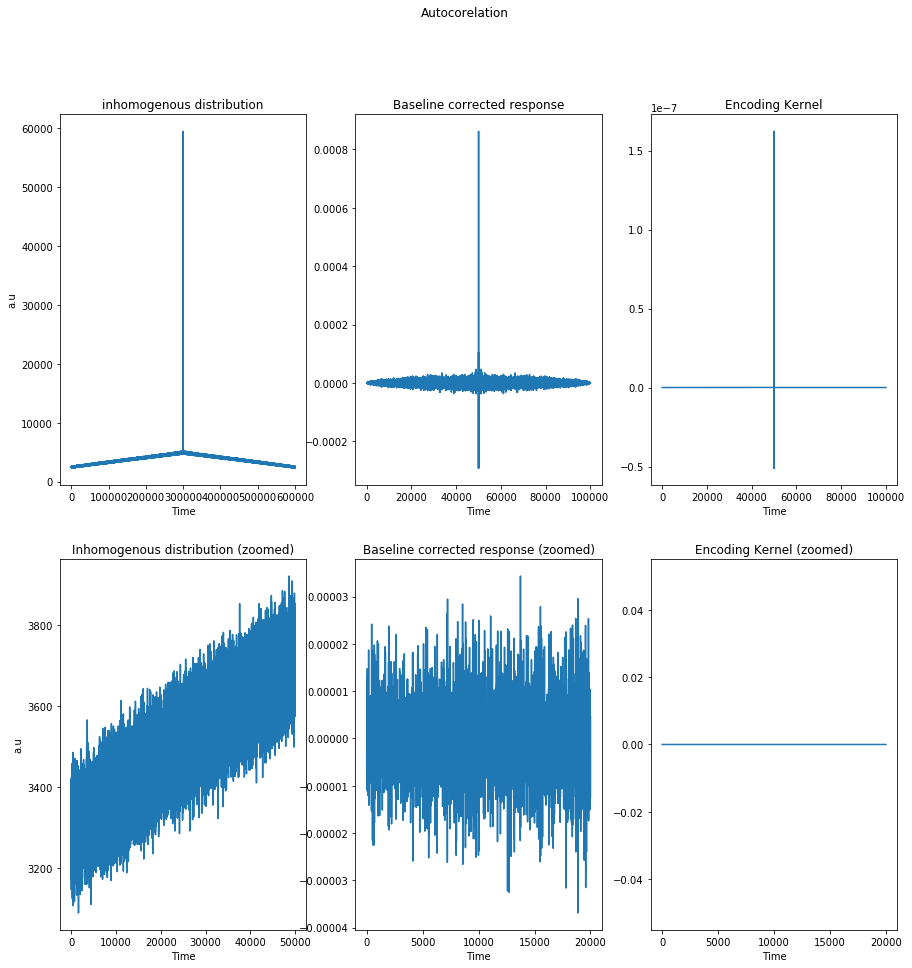

In [18]:
fig, axs = plt.subplots(2, 3, figsize=(15, 15))

plt.sca(axs[0, 0])
plt.plot(rho_auto)
plt.title('inhomogenous distribution')
plt.xlabel('Time')
plt.ylabel('a.u')

plt.sca(axs[0, 1])
plt.plot(auto_cor)
plt.title('Baseline corrected response')
plt.xlabel('Time')

plt.sca(axs[0, 2])
plt.plot(D_auto)
plt.title('Encoding Kernel')
plt.xlabel('Time')

plt.sca(axs[1, 0])
plt.plot(rho_auto[100000:150000])
plt.title('Inhomogenous distribution (zoomed)')
plt.xlabel('Time')
plt.ylabel('a.u')

plt.sca(axs[1, 1])
plt.plot(auto_cor[20000:40000])
plt.title('Baseline corrected response (zoomed)')
plt.xlabel('Time')

plt.sca(axs[1, 2])
plt.plot(D_auto[20000:40000])
plt.title('Encoding Kernel (zoomed)')
plt.xlabel('Time')

plt.suptitle('Autocorelation')
plt.show()

**Observation:** Similar distribution shape between them except the spikes.

**f**

In [19]:
K, K_time, s_est, K_time = ed.estimate_decoder(t, stimulus, r_est, dt)

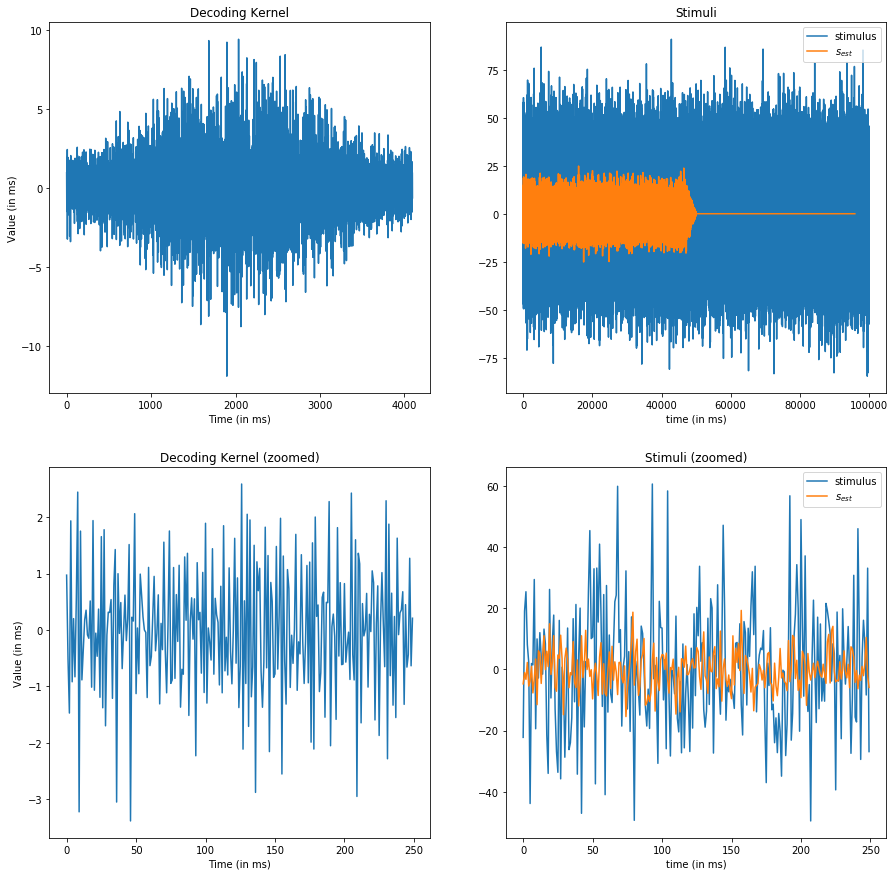

In [20]:
fig, axs = plt.subplots(2, 2, figsize=(15, 15))

plt.sca(axs[0, 0])
plt.plot(K)
plt.title('Decoding Kernel')
plt.xlabel('Time (in ms)')
plt.ylabel('Value (in ms)')

plt.sca(axs[0, 1])
plt.plot(stimulus, label = 'stimulus')
plt.plot(s_est, label = r'$s_{est}$')
plt.title('Stimuli')
plt.legend()
plt.xlabel('time (in ms)')

plt.sca(axs[1, 0])
plt.plot(K[0: 250])
plt.title('Decoding Kernel (zoomed)')
plt.xlabel('Time (in ms)')
plt.ylabel('Value (in ms)')

plt.sca(axs[1, 1])
plt.plot(stimulus[0: 250], label = 'stimulus')
plt.plot(s_est[0: 250], label = r'$s_{est}$')
plt.title('Stimuli (zoomed)')
plt.legend()
plt.xlabel('time (in ms)')

plt.show()

**g**